In [66]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive 
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [67]:
data = pd.read_csv("books.csv", error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [68]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [69]:
data.shape

(11123, 12)

In [70]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [71]:
# remove spaces from the column name
data.columns = data.columns.str.strip()

In [72]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [74]:
# getting summary of the data
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [75]:
# getting summary of object data type
data.describe(include="object")

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,P.G. Wodehouse,1930332351,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [76]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [77]:
data.duplicated().sum()

0

In [78]:
data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### Feature Engineering

- Extract important features
- reducing size of the features
- creating new features from the existing ones

In [79]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [80]:
data["isbn"].nunique()

11123

In [81]:
data["isbn13"].nunique()

11123

In [82]:
# reducing the size of the features
# droping the unnecessary columns
data.drop(['bookID','isbn', 'isbn13'], axis=1 , inplace=True)

In [83]:
data.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic


In [84]:
data["publication_date"]

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [85]:
data["year"] = data["publication_date"].str.split("/")
data["year"] = data["year"].apply(lambda x: x[2])

In [86]:
data.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [87]:
data.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [88]:
data["year"] = data["year"].astype(int)

In [89]:
data["year"].min()

1900

In [90]:
data["year"].max()

2020

### Explotary data Analysis

In [91]:
data[data["year"] == 2020][["title", "authors" , "average_rating", "language_code", "publisher"]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [92]:
data.groupby(["year"])["title"].agg("count").sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

Text(0.5, 1.0, 'Top 10 Author with maximum books published')

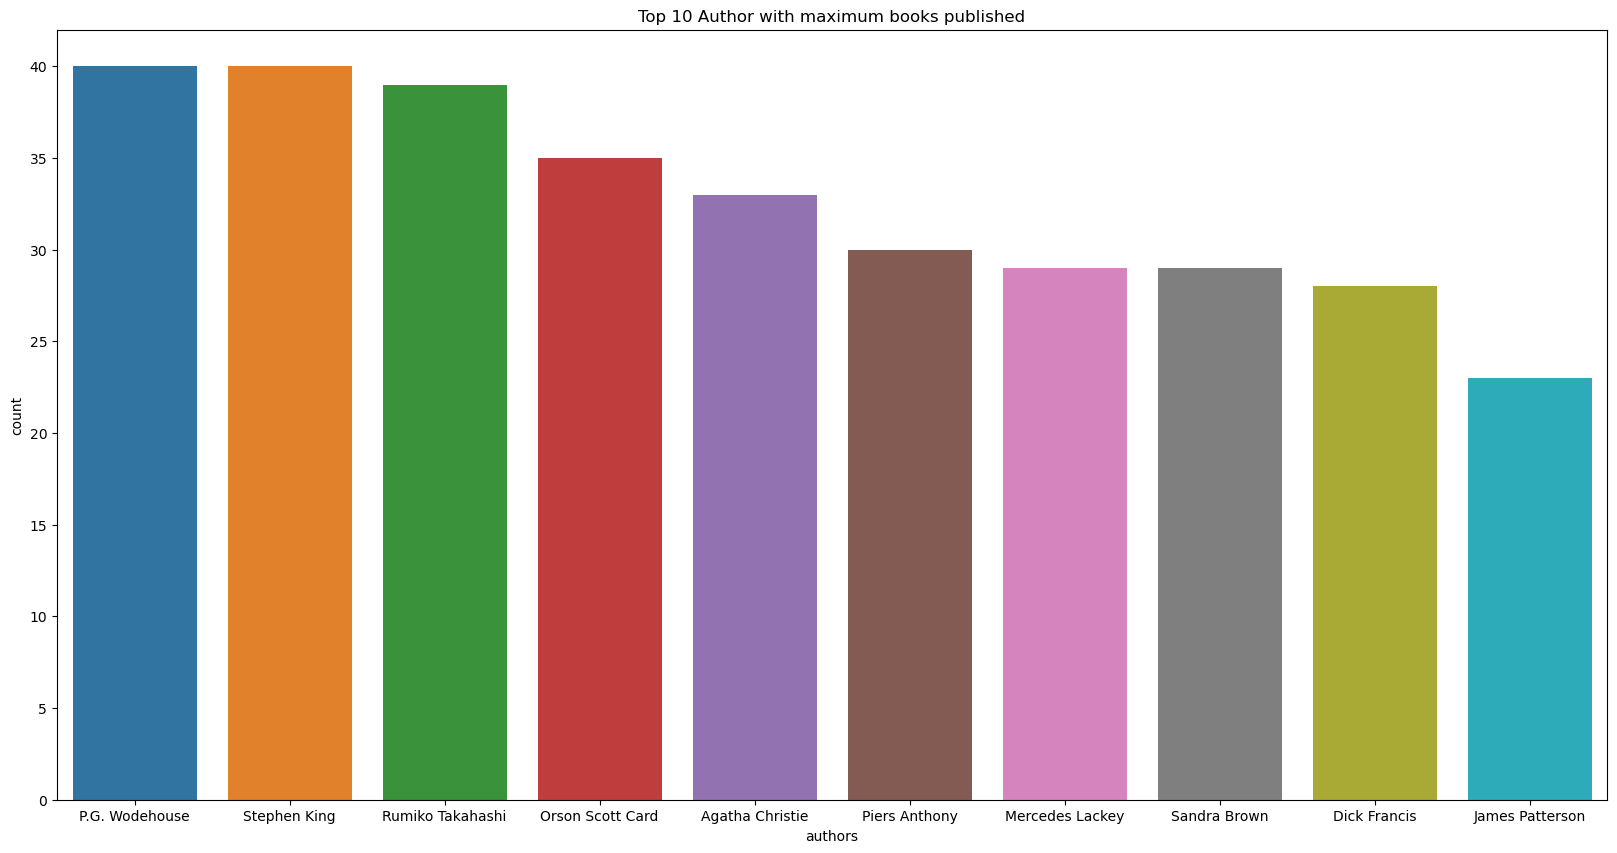

In [93]:
plt.figure(figsize=(20,10))
sns.countplot(data=data , x="authors", order=data["authors"].value_counts().iloc[:10].index)
plt.title("Top 10 Author with maximum books published")

In [94]:
data["language_code"].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
glg         1
ara         1
nor         1
ale         1
wel         1
srp         1
msa         1
gla         1
tur         1
nl          1
Name: language_code, dtype: int64

In [95]:
data.groupby(["language_code"])[["average_rating", 
                                 "ratings_count", 
                                 "text_reviews_count"]].agg("mean").style.background_gradient(cmap="Wistia")

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [96]:
book = data["title"].value_counts()[:20]

In [97]:
book

The Iliad                     9
The Brothers Karamazov        9
Anna Karenina                 8
'Salem's Lot                  8
The Odyssey                   8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
Jane Eyre                     6
Macbeth                       6
Romeo and Juliet              6
The Scarlet Letter            6
The Great Gatsby              6
Treasure Island               6
The Secret Garden             6
Sense and Sensibility         6
Collected Stories             6
The Histories                 6
Robinson Crusoe               6
The Shining                   5
Name: title, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Iliad'),
  Text(1, 0, 'The Brothers Karamazov'),
  Text(2, 0, 'Anna Karenina'),
  Text(3, 0, "'Salem's Lot"),
  Text(4, 0, 'The Odyssey'),
  Text(5, 0, "Gulliver's Travels"),
  Text(6, 0, 'The Picture of Dorian Gray'),
  Text(7, 0, "A Midsummer Night's Dream"),
  Text(8, 0, 'Jane Eyre'),
  Text(9, 0, 'Macbeth'),
  Text(10, 0, 'Romeo and Juliet'),
  Text(11, 0, 'The Scarlet Letter'),
  Text(12, 0, 'The Great Gatsby'),
  Text(13, 0, 'Treasure Island'),
  Text(14, 0, 'The Secret Garden'),
  Text(15, 0, 'Sense and Sensibility'),
  Text(16, 0, 'Collected Stories'),
  Text(17, 0, 'The Histories'),
  Text(18, 0, 'Robinson Crusoe'),
  Text(19, 0, 'The Shining')])

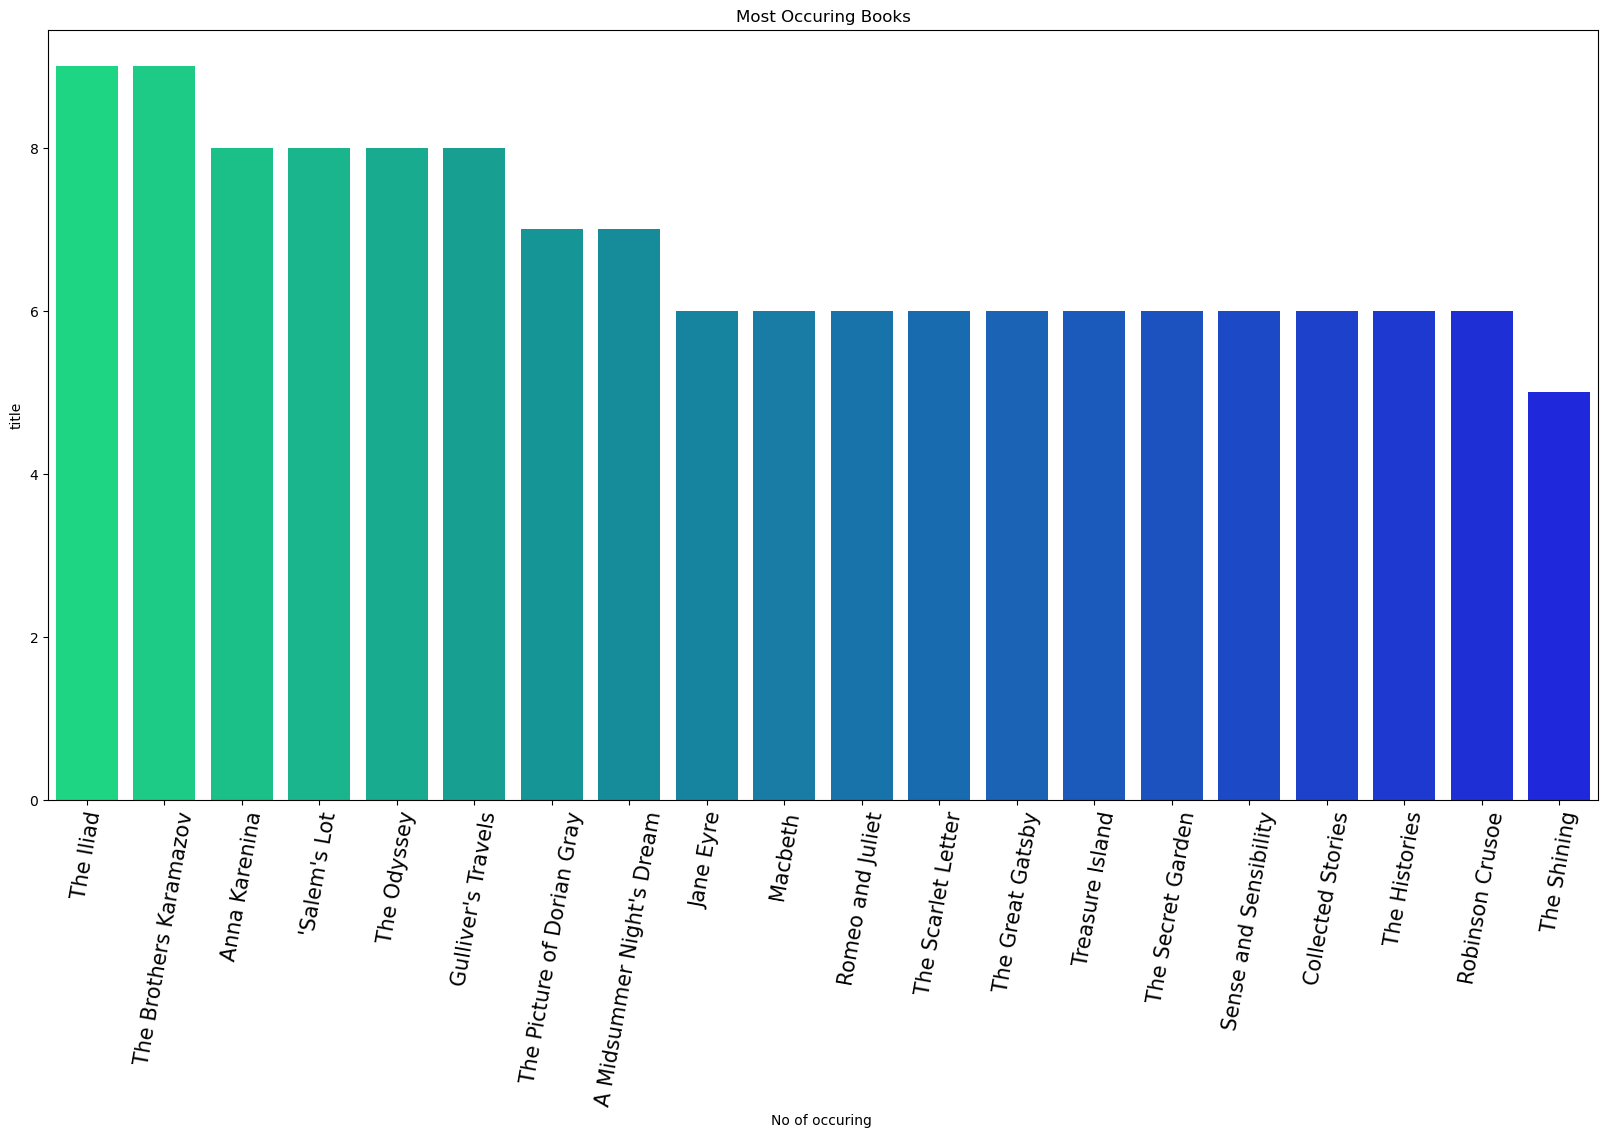

In [98]:
# most find occuring book in the data
plt.figure(figsize=(20 , 10))
sns.barplot(x = book.index , y = book , palette="winter_r")
plt.title("Most Occuring Books")
plt.xlabel("No of occuring ")
plt.xticks(rotation = 80, fontsize=15)

C:\Temp\ipykernel_8364\640360161.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["average_rating"])


<Axes: xlabel='average_rating', ylabel='Density'>

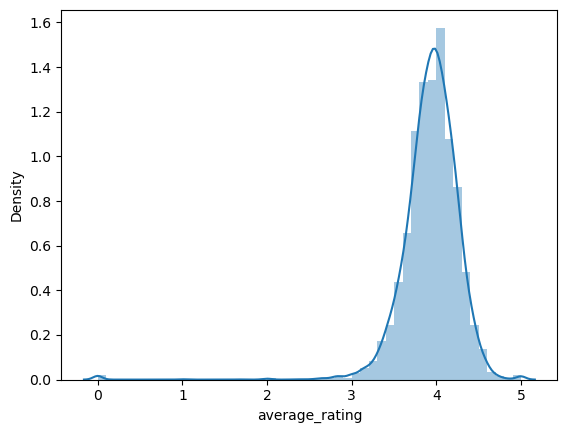

In [99]:
# average ratings
sns.distplot(data["average_rating"])

In [100]:
data[data["average_rating"] == data["average_rating"].max()][["authors", "average_rating"]]

,authors,average_rating
624,Aristophanes/F.W. Hall/W.M. Geldart,5.0
786,Julie Sylvester/David Sylvester,5.0
855,Tara MacCarthy,5.0
1243,Middlesex Borough Heritage Committee,5.0
4125,Tim Bogenn,5.0
4788,John Diamond,5.0
4933,Elena N. Mahlow,5.0
5023,Ian Martin/Katie Elliott,5.0
5474,NOT A BOOK,5.0
5476,NOT A BOOK,5.0


In [101]:
publisher = data["publisher"].value_counts()[:20]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Vintage'),
  Text(1, 0, 'Penguin Books'),
  Text(2, 0, 'Penguin Classics'),
  Text(3, 0, 'Mariner Books'),
  Text(4, 0, 'Ballantine Books'),
  Text(5, 0, 'HarperCollins'),
  Text(6, 0, 'Harper Perennial'),
  Text(7, 0, 'Pocket Books'),
  Text(8, 0, 'Bantam'),
  Text(9, 0, 'VIZ Media LLC'),
  Text(10, 0, 'Berkley'),
  Text(11, 0, 'Dover Publications'),
  Text(12, 0, 'Modern Library'),
  Text(13, 0, 'Del Rey'),
  Text(14, 0, 'Tor Books'),
  Text(15, 0, 'Grand Central Publishing'),
  Text(16, 0, 'Oxford University Press  USA'),
  Text(17, 0, 'Scribner'),
  Text(18, 0, 'Oxford University Press'),
  Text(19, 0, 'W. W. Norton  Company')])

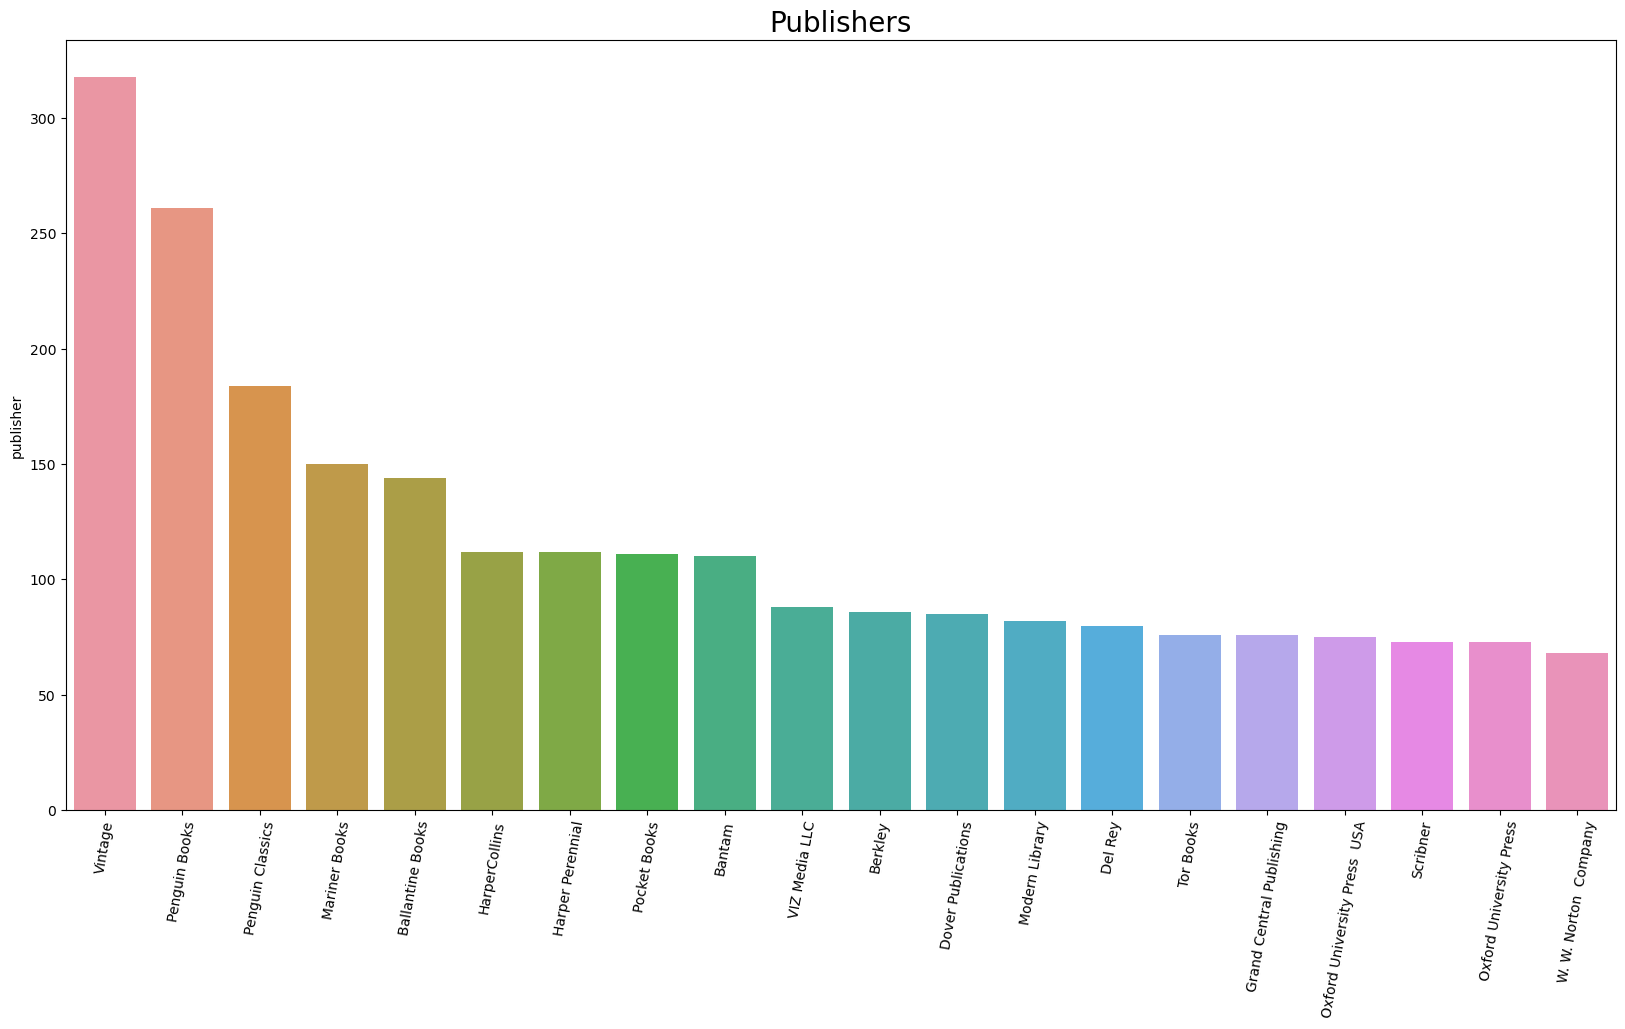

In [102]:
plt.figure(figsize=(20 ,10))
sns.barplot(x = publisher.index , y = publisher)
plt.title("Publishers", fontsize=20)
plt.xticks(rotation =80)

### Recommendation Books based on publishers

In [103]:
def recomed_book_publishers(x):
    a = data[data["publisher"] == x][["title", "average_rating"]]
    a = a.sort_values(by = "average_rating" , ascending=False)
    return a.head(10)

In [104]:
recomed_book_publishers('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [105]:
recomed_book_publishers('Harper Perennial')

,title,average_rating
2578,Beauty: The Invisible Embrace,4.47
10796,Full Woman Fleshly Apple Hot Moon: Selected ...,4.45
1265,First They Killed My Father: A Daughter of Cam...,4.35
3429,Three by Annie Dillard: Pilgrim at Tinker Cree...,4.34
5657,When Nietzsche Wept,4.32
4494,Declarations of Independence: Cross-Examining ...,4.26
2656,Wild Swans: Three Daughters of China,4.26
5179,The Modern Mind: An Intellectual History of th...,4.26
9251,Great Short Works,4.26
6686,Savage Inequalities: Children in America's Sch...,4.25


In [106]:
recomed_book_publishers('Penguin Books')

,title,average_rating
4244,The Complete Maus,4.55
5564,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4602,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4551,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4980,Life at Blandings,4.35
10867,The Portable Dorothy Parker,4.34


### Recommendation Books based on authors

In [107]:
def recommed_books_author(x):
    a = data[data["authors"] == x][["title" , "average_rating"]]
    a = a.sort_values(by = "average_rating" , ascending = False)
    return a.head(10)

In [108]:
recommed_books_author("Agatha Christie")

,title,average_rating
8146,Five Complete Miss Marple Novels: The Mirror C...,4.39
8151,Miss Marple Omnibus Vol. 3 (Murder at the Vica...,4.32
4566,Hercule Poirot's Casebook (Hercule Poirot #42),4.31
4518,And Then There Were None,4.26
4531,The Murder of Roger Ackroyd (Hercule Poirot #4),4.24
4580,Poirot: The Complete Ariadne Oliver Vol. 2,4.21
4545,Murder on the Orient Express (Hercule Poirot ...,4.17
4521,Murder on the Orient Express (Hercule Poirot ...,4.17
4546,Death on the Nile (Hercule Poirot #17),4.10
4534,Murder at the Vicarage (Miss Marple #1),4.05


In [109]:
recommed_books_author("J.K. Rowling")

,title,average_rating
6,Harry Potter Collection (Harry Potter #1-6),4.73
615,Harry Potter and the Half-Blood Prince (Harry ...,4.57
1233,Harry Potter and the Prisoner of Azkaban (Harr...,4.56
10346,Harry Potter und der Gefangene von Askaban (Ha...,4.56
10675,Harry Potter and the Goblet of Fire (Harry Pot...,4.56
4412,Harry Potter y la Orden del Fénix (Harry Potte...,4.49
988,Harry Potter Y La Piedra Filosofal (Harry Pott...,4.47
10674,Harry Potter and the Philosopher's Stone (Harr...,4.47
2,Harry Potter and the Chamber of Secrets (Harry...,4.42
10343,Harry Potter und die Kammer des Schreckens (Ha...,4.42


In [110]:
data["authors"].unique()

array(['J.K. Rowling/Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana Falcão Bastos',
       'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

### Recommendation Books based on language

In [111]:
def recommed_book_lang(x):
    a = data[data["language_code"] == x][["title" , "average_rating"]]
    a = a.sort_values(by = "average_rating" , ascending= False)
    return a.head(10)

In [112]:
recommed_book_lang("en-US")

,title,average_rating
9430,Little Big Book for God's Children,4.88
4811,The Feynman Lectures on Physics Vols 7-8,4.80
4810,The Feynman Lectures on Physics Vols 3-4,4.71
7042,The Sibley Field Guide to Birds of Western Nor...,4.69
6196,Discovery of the Presence of God: Devotional N...,4.61
1611,The Feynman Lectures on Physics 3 Vols,4.60
1040,The World's First Love: Mary Mother of God,4.59
4812,The Feynman Lectures on Physics Vols 5-6,4.59
8648,The More Than Complete Hitchhiker's Guide (Hit...,4.58
4052,The Complete Lyrics of Cole Porter,4.53


In [113]:
recommed_book_lang("jpn")

,title,average_rating
9350,鋼の錬金術師 8 (Fullmetal Alchemist 8),4.57
9349,鋼の錬金術師 3 (Fullmetal Alchemist #3),4.56
9348,鋼の錬金術師 5 (Fullmetal Alchemist #5),4.56
9347,鋼の錬金術師 4 (Fullmetal Alchemist #4),4.55
9346,鋼の錬金術師 1 [Hagane no Renkinjutsushi 1] (Fullmet...,4.50
3755,彼方から 13,4.48
872,DEATH NOTE デスノート 1,4.43
874,Death Note Vol. 3: 激走 (Death Note #3),4.43
873,Death Note Vol. 4: 恋心 (Death Note #4),4.39
9612,LOVE MODE 11,4.37


In [114]:
data["language_code"].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
glg         1
ara         1
nor         1
ale         1
wel         1
srp         1
msa         1
gla         1
tur         1
nl          1
Name: language_code, dtype: int64

### Data Pre-processing

In [115]:
def num_to_obj(x):
    if x > 0 and x <=1:
        return "Between 0 to 1"
    if x > 1 and x <=2:
        return "Between 1 to 2"
    if x > 2 and x <=3:
        return "Between 2 to 3"
    if x>3 and x <=4:
        return "Between 3 to 4"
    if x > 4 and x <=5:
        return "Between 4 to 5"

In [116]:
data["Ratings_obj"] = data["average_rating"].apply(num_to_obj)

In [117]:
data.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,Ratings_obj
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,Between 4 to 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,Between 4 to 5


In [118]:
data["Ratings_obj"].value_counts()

Between 3 to 4    6285
Between 4 to 5    4735
Between 2 to 3      69
Between 1 to 2       7
Between 0 to 1       2
Name: Ratings_obj, dtype: int64

In [119]:
rating_df = pd.get_dummies(data["Ratings_obj"])
rating_df

,Between 0 to 1,Between 1 to 2,Between 2 to 3,Between 3 to 4,Between 4 to 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,0,1
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,1,0


In [120]:
language = pd.get_dummies(data["language_code"])
language

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
features = pd.concat([rating_df, language, data["average_rating"], data["ratings_count"] , data["title"]] , axis= 1)
features.set_index("title" , inplace=True)

In [122]:
features

,Between 0 to 1,Between 1 to 2,Between 2 to 3,Between 3 to 4,Between 4 to 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Expelled from Eden: A William T. Vollmann Reader,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.06,156
You Bright and Risen Angels,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.08,783
The Ice-Shirt (Seven Dreams #1),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.96,820


In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(features)

### Model Building

In [125]:
from sklearn import neighbors

In [126]:
model = neighbors.NearestNeighbors(n_neighbors=5 , algorithm="ball_tree" , metric="euclidean")
model.fit(feature_scaled)
dist , idlist = model.kneighbors(feature_scaled)

In [128]:
@interact
def book_recommender(book_name = list(data["title"].value_counts().index)):
    book_list_name = []
    book_id = data[data["title"] == book_name.index]
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(data.iloc[newid])
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'Anna …